In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [8]:
X=df.drop(['FWI'],axis=1)
y=df['FWI']

In [9]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [10]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [14]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

<Axes: >

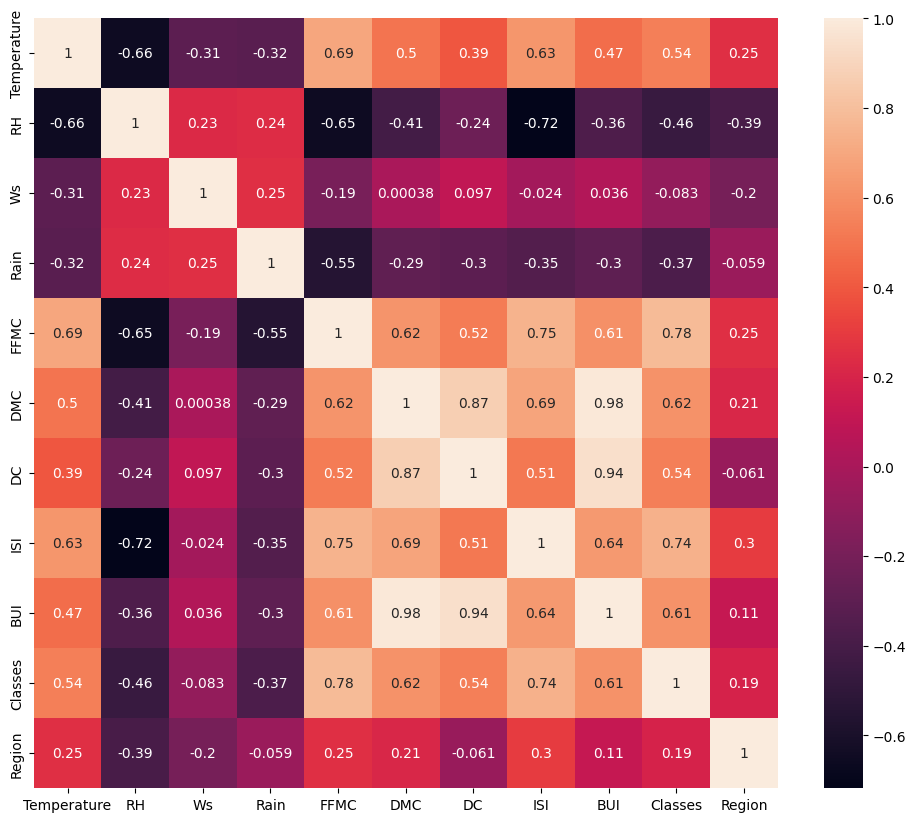

In [15]:
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [16]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [21]:
corr_features=correlation(X_train,0.85)

In [22]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<Axes: >

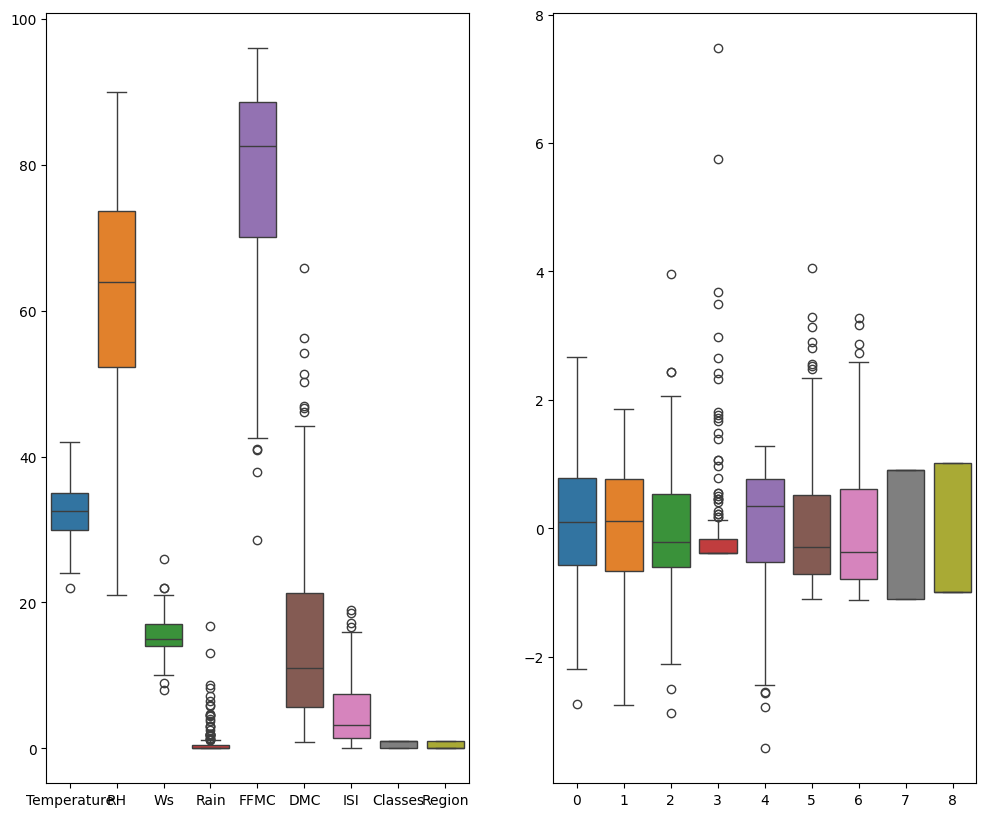

In [24]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

0.5468236465249986 0.9847657384266951


[]

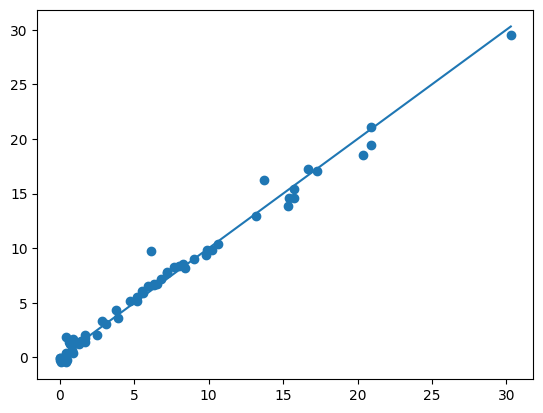

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)
plt.plot()

LASSO Regression

1.133175994914409 0.9492020263112388


[]

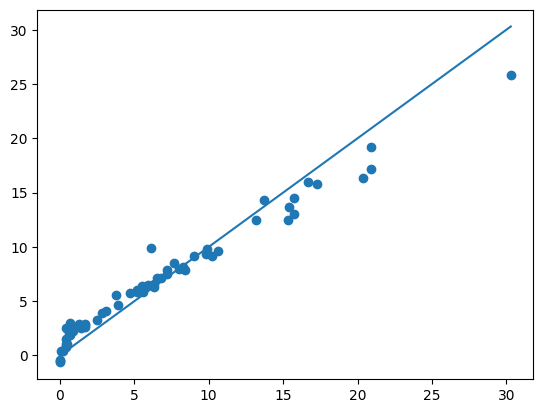

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=Lasso()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)
plt.plot()

RIDGE

0.5642305340105692 0.9842993364555513


[]

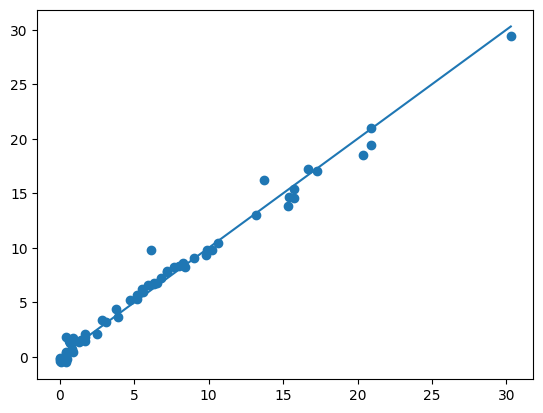

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=Ridge()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)
plt.plot()

Elastic Net

1.8822353634896005 0.8753460589519703


[]

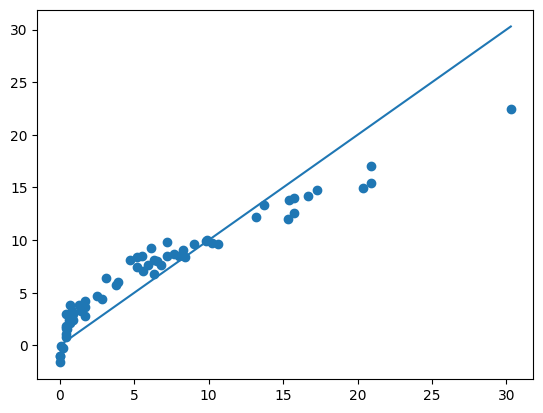

In [28]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=ElasticNet()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)
plt.plot()

In [29]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

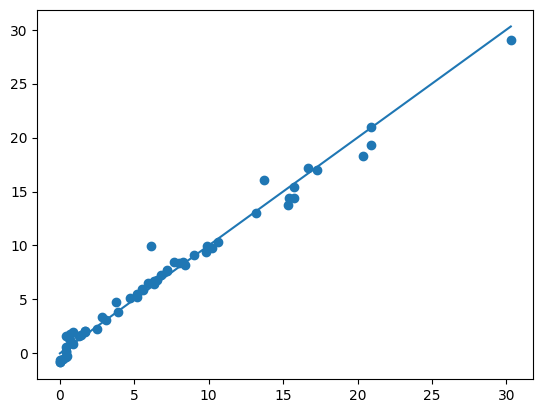

In [30]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)])


In [31]:
import pickle

0.5642305340105692 0.9842993364555513


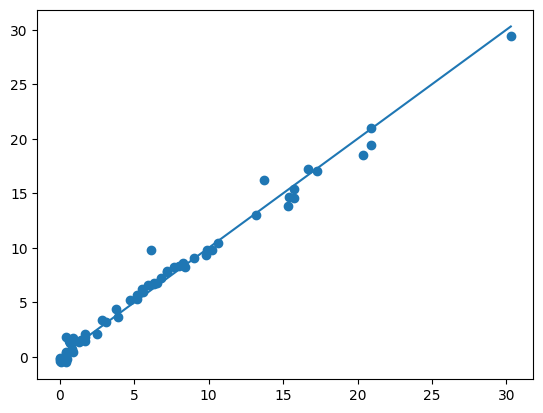

In [32]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
regression=Ridge()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(mae,score)
plt.plot()
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression,open('ridge.pkl','wb'))